In [1]:
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
mpl.rcParams['figure.figsize'] = (12,12)
import seaborn as sns
sns.set_style("white", {"font.family": "serif"})

In [2]:
import sys
sys.path.append('../../../python-modules')

In [3]:
from utilities import filemanip

In [4]:
from synthanalysis import imb

In [5]:
sizelist = [0,
            4,
            8,
           16,
           32,
           64,
          128,
          256,
          512,
         1024,
         2048,
         4096,
         8192,
        16384,
        32768,
        65536,
       131072,
       262144,
       524288,
      1048576,
      2097152,
      4194304]

In [33]:
intracxx = imb.get_perf_dict('../results/ARCHER2_CrayMPICH8015_pingpong/IMB_PingPong_1nodes_CrayMPICH_intraccx_202012171721.out', 1)
intranuma = imb.get_perf_dict('../results/ARCHER2_CrayMPICH8015_pingpong/IMB_PingPong_1nodes_CrayMPICH_intranuma_202012171722.out', 1)
intrasocket = imb.get_perf_dict('../results/ARCHER2_CrayMPICH8015_pingpong/IMB_PingPong_1nodes_CrayMPICH_intrasocket_202012171724.out', 1)
intranode = imb.get_perf_dict('../results/ARCHER2_CrayMPICH8015_pingpong/IMB_PingPong_1nodes_CrayMPICH_intranode_202012171726.out', 1)
internode = imb.get_perf_dict('../results/ARCHER2_CrayMPICH8015_pingpong/IMB_PingPong_2nodes_CrayMPICH_internode_202012171727.out', 1)

bindcores = imb.get_perf_dict('../results/ARCHER2_CrayMPICH8015_pingpong/IMB_PingPong_1nodes_CrayMPICH_cores_202012151909.out', 1)
bindrank = imb.get_perf_dict('../results/ARCHER2_CrayMPICH8015_pingpong/IMB_PingPong_1nodes_CrayMPICH_rank_202012151909.out', 1)
bindcyclic = imb.get_perf_dict('../results/ARCHER2_CrayMPICH8015_pingpong/IMB_PingPong_1nodes_CrayMPICH_cyclic_202012171206.out', 1)


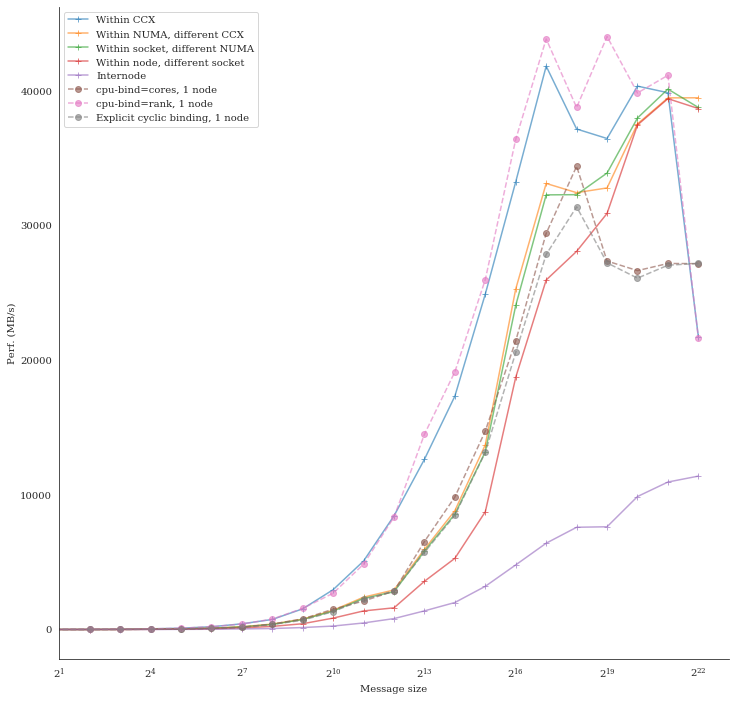

In [34]:
plt.plot(sizelist, imb.get_size_scaling(sizelist, 1, intracxx), '-+', label='Within CCX', alpha=0.6)
plt.plot(sizelist, imb.get_size_scaling(sizelist, 1, intranuma), '-+', label='Within NUMA, different CCX', alpha=0.6)
plt.plot(sizelist, imb.get_size_scaling(sizelist, 1, intrasocket), '-+', label='Within socket, different NUMA', alpha=0.6)
plt.plot(sizelist, imb.get_size_scaling(sizelist, 1, intranode), '-+', label='Within node, different socket', alpha=0.6)
plt.plot(sizelist, imb.get_size_scaling(sizelist, 1, internode), '-+', label='Internode', alpha=0.6)

plt.plot(sizelist, imb.get_size_scaling(sizelist, 1, bindcores), '--o', label='cpu-bind=cores, 1 node', alpha=0.6)
plt.plot(sizelist, imb.get_size_scaling(sizelist, 1, bindrank), '--o', label='cpu-bind=rank, 1 node', alpha=0.6)
plt.plot(sizelist, imb.get_size_scaling(sizelist, 1, bindcyclic), '--o', label='Explicit cyclic binding, 1 node', alpha=0.6)

sns.despine()
plt.xscale('log', basex=2)
plt.xlabel("Message size")
plt.ylabel("Perf. (MB/s)")
plt.legend(loc='best')